#Thông tin bộ dữ liệu


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_rows', 15000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/CVD/Code NCKH/data_final.xlsx')

In [ ]:
# Hàm có chức năng xóa các kí tự, chữ thừa trong tên cột
def rep_func(df, part, sub):
    df.columns = [re.sub(part, sub, col.strip()) for col in df.columns]
    return df

replacements = {
    r'\nNgày: \d{2}/\d{2}/\d{4}\nĐơn vị: VND': '',
    r'\nHợp nhất\nĐã kiểm toán\nQuý: Hàng năm\nNăm: \d{4}\nĐơn vị: VND': '',
    r'\nNăm: \d{4}\nĐơn vị: VND':'',
    r'\nChỉ số năm\nNăm: \d{4}\nĐơn vị: %': '',
    r'\nChỉ số năm\nNăm: 2015\nĐơn vị: Lần':'',
    r'\nĐơn vị: Cổ phiếu':'',
    r'\nĐơn vị: VND':'',
    r'\nNăm phát hành: \d{4}\nHình thức phát hành: Trả cổ tức cổ phiếu\nNgày chốt quyền: Gần nhất':'',
    r'\nNăm trả cổ tức: 2015\nKỳ trả: Gần nhất':'',
    r'\nNgày: 31/12/2015\nĐơn vị: %':'',
    r'\nNgày: 31/12/2015\nĐơn vị: Lần': '',
    r'\nChỉ số năm':'',
    r'\nĐơn vị: %':'',
    r'%':'',
    r'\nNăm: 2015\nĐơn vị: Ngày':'',
    r'\nNăm: 2015\nĐơn vị: Tỷ VND':'',
    r'\n(Quý, Năm)':''
}

for key, value in replacements.items():
    df = rep_func(df, key, value)
df.head()

,STT,Mã,Tên công ty,Sàn,Năm,Ngành,Số CP niêm yết,Ngày niêm yết,Giá chào sàn,Số cổ đông phổ thông,Số cổ phiếu lưu hành,Số nhân viên hiện tại,Giá trị / Cổ phiếu,Đợt trả,Ngày thông báo,Ngày thanh toán,Tỷ lệ trả cổ tức,Khối lượng phát hành,Đợt trả,Ngày thông báo,Ngày phát hành,Tỷ lệ sở hữu nhà nước,Tỷ lệ sở hữu nước ngoài,Tỷ lệ sở hữu khác,Tỷ lệ sở hữu tối đa NĐTNN,Beta (2 năm),EPS cơ bản,Giá trị dòng tiền tạo ra/ cổ phiếu,P/E cơ bản,P/B,P/S,Vốn hóa thị trường,Giá trị doanh nghiệp (EV),ROE,ROA,ROS,ROIC,ROCE,Hệ số quay vòng phải thu khách hàng,Thời gian trung bình thu tiền khách hàng,Hệ số quay vòng hàng tồn kho,Thời gian trung bình xử lý hàng tồn kho,Hệ số quay vòng phải trả nhà cung cấp,Thời gian trung bình thanh toán cho nhà cung cấp,Doanh thu tính trên đầu người,Lợi nhuận thuần tính trên đầu người,Tỷ suất thanh toán tiền mặt,Tỷ suất thanh toán nhanh,Tỷ suất thanh toán hiện thời,EBIT,EBITDA,Tỷ suất lợi nhuận trước thuế,Hệ số vòng quay tài sản,Hệ số vòng quay vốn chủ sở hữu,Tăng trưởng EPS (YoY),"Tăng trưởng lợi nhuận trước thuế (Quý, Năm)",Tỷ suất cổ tức (Thực trả),Chi phí tài chính trung bình,Tỷ lệ nợ xấu,Giá cao nhất 1 năm,Giá thấp nhất 1 năm,Khối lượng trung bình 1 năm\nNgày: 31/12/2015,Giá trị trung bình 1 năm,I. TÀI SẢN NGẮN HẠN,1. Tiền và tương đương tiền,1.1. Tiền,1.2. Các khoản tương đương tiền,2. Đầu tư tài chính ngắn hạn,2.1. Chứng khoán kinh doanh,2.2. Dự phòng giảm giá chứng khoán kinh doanh,2.3. Đầu tư nắm giữ đến ngày đáo hạn,3. Các khoản phải thu ngắn hạn,3.1. Phải thu ngắn hạn của khách hàng,3.2. Trả trước cho người bán ngắn hạn,3.3. Phải thu nội bộ ngắn hạn,3.4. Phải thu theo tiến độ kế hoạch hợp đồng xây dựng,3.5. Phải thu về cho vay ngắn hạn,3.6. Phải thu ngắn hạn khác,3.7. Dự phòng phải thu ngắn hạn khó đòi,3.8. Tài sản thiếu chờ xử lý,"4. Hàng tồn kho, ròng",4.1. Hàng tồn kho,4.2. Dự phòng giảm giá HTK,5. Tài sản ngắn hạn khác,5.1. Chi phí trả trước ngắn hạn,5.2. Thuế GTGT được khấu trừ,5.3. Thuế và các khoản khác phải thu Nhà nước,5.4. Giao dịch mua bán lại trái phiếu chính phủ,5.5. Tài sản ngắn hạn khác,II. TÀI SẢN DÀI HẠN,1. Phải thu dài hạn,1.1. Phải thu khách hang dài hạn,1.2. Trả trước người bán dài hạn,1.3. Vốn kinh doanh ở các đơn vị trực thuộc,1.4. Phải thu nội bộ dài hạn,1.5. Phải thu về cho vay dài hạn,1.6. Phải thu dài hạn khác,1.7. Dự phòng phải thu dài hạn,2. Tài sản cố định,2.1. GTCL TSCĐ hữu hình,2.1.1. Nguyên giá TSCĐ hữu hình,2.1.2. Khấu hao lũy kế TSCĐ hữu hình,2.2. GTCL Tài sản thuê tài chính,2.2.1. Nguyên giá tài sản thuê tài chính,2.2.2. Khấu hao lũy kế tài sản thuê tài chính,2.3. GTCL tài sản cố định vô hình,2.3.1. Nguyên giá TSCĐ vô hình,2.3.2. Khấu khao lũy kế TSCĐ vô hình,2.4. Xây dựng cơ bản dở dang (trước 2015),3. Giá trị ròng tài sản đầu tư,3.1. Nguyên giá tài sản đầu tư,3.2. Khấu hao lũy kế tài sản đầu tư,4. Tài sản dở dang dài hạn,"4.1. Chi phí sản xuất, kinh doanh dở dang dài hạn",4.2. Xây dựng cơ bản dở dang,5. Đầu tư dài hạn,5.1. Đầu tư vào các công ty con,5.2. Đầu tư vào các công ty liên kết,5.3. Đầu tư dài hạn khác,5.4. Dự phòng giảm giá đầu tư dài hạn,5.5. Đầu tư nắm giữ đến ngày đáo hạn,6. Lợi thế thương mại (trước 2015),7. Tài sản dài hạn khác,7.1. Trả trước dài hạn,7.2. Tài sản thuế thu nhập hoãn lại,"7.3. Thiết bị, vật tư, phụ tùng thay thế dài hạn",7.4. Các tài sản dài hạn khác,7.5. Lợi thế thương mại,A. TỔNG CỘNG TÀI SẢN,I. NỢ PHẢI TRẢ,1. Nợ ngắn hạn,1.1. Phải trả người bán ngắn hạn,1.2. Người mua trả tiền trước ngắn hạn,1.3. Thuế và các khoản phải trả Nhà nước,1.4. Phải trả người lao động,1.5. Chi phí phải trả ngắn hạn,1.6. Phải trả nội bộ ngắn hạn,1.7. Phải trả theo tiến độ kế hoạch hợp đồng xây dựng,1.8. Doanh thu chưa thực hiện ngắn hạn,1.9. Phải trả khác,1.10. Vay và nợ thuê tài chính ngắn hạn,1.11. Dự phòng các khoản phải trả ngắn hạn,"1.12. Quỹ khen thưởng, phúc lợi",1.13. Quỹ bình ổn giá,1.14. Giao dịch mua bán lại trái phiếu chính phủ,2. Nợ dài hạn,2.1. Phải trả nhà cung cấp dài hạn,2.2. Người mua trả tiền trước dài hạn,2.3. Chi phí phải trả dài hạn,2.4. Ph

In [ ]:
df.isna().sum()

STT                                                                         0
Mã                                                                          0
Tên công ty                                                                 0
Sàn                                                                         0
Năm                                                                         0
Ngành                                                                     712
Số CP niêm yết                                                              0
Ngày niêm yết                                                             496
Giá chào sàn                                                               96
Số cổ đông phổ thông                                                     3344
Số cổ phiếu lưu hành                                                        0
Số nhân viên hiện tại                                                     232
Giá trị / Cổ phiếu                                              

In [ ]:
#tạo một dataframe mới chỉ bao gồm ngành sản xuất
df1 =  df[df['Ngành']=='Sản xuất']

In [ ]:
df.shape

(13424, 258)

In [ ]:
print('Bộ dữ liệu có: {} hàng và {} cột'.format(df1.shape[0], df1.shape[1]))

Bộ dữ liệu có: 4248 hàng và 258 cột


In [ ]:
count_companies = df1['Mã'].nunique()
print(f'Bộ dữ liệu có {count_companies} công ty')

Bộ dữ liệu có 531 công ty


In [ ]:
print('Dữ liệu trùng lặp: {}'.format(df1.duplicated().sum()))

Dữ liệu trùng lặp: 0


# Tính toán các biến cho mô hình Z- score
* Z = 1,2*X1+ 1,4*X2+ 3,3*X3+ 0,6*X4 +1,0*X5
* X1= Vốn Lưu động / tổng tài sản
* X2= Lợi nhuận sau thuế/tổng tài sản
* X3 = EBIT/ tổng tài sản
* X4 = Vốn chủ sở hữu / Tổng nợ phải trả
* X5= Doanh thu thuần/ Tổng tài sản




In [ ]:
ratio = df1[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28']]

In [ ]:
#Cột thông tin của doanh nghiệp
muc = df1[['Mã', 'Tên công ty', 'Năm', 'Ngành']]

In [ ]:
#Lấy các cột dữ liệu để tính X1 ( các cái còn lại hiểu tương tự)

# tổng tài sản
tongtaisan = df1.filter(like='TỔNG CỘNG TÀI SẢN')

# Vốn lưu động = tài sản ngắn hạn - nợ ngắn hạn
taisannganhan = df1.filter(like='TÀI SẢN NGẮN HẠN')
nonganhan = df1.filter(like='Nợ ngắn hạn')

#Lợi nhuận sau thuế
Loinhuansauthue = df1.filter(like='Lợi nhuận sau thuế thu nhập')

#EBIT
EBIT = df1.filter(like='EBIT')

#Vốn chủ sở hữu
vonchusohu = df1.filter(like='VỐN CHỦ SỞ HỮU')

#nợ phải trả
nophaitra = df1.filter(like='NỢ PHẢI TRẢ')

#Cột doanh thu thuần
doanhthu = df1.filter(like='Doanh thu thuần')

In [ ]:
#Gồm các cột dữ liệu trên vào datafame 1
df1 = pd.concat([muc, tongtaisan, taisannganhan, nonganhan, Loinhuansauthue, EBIT, vonchusohu, nophaitra, doanhthu], axis=1)

In [ ]:
df1.head(2)

,Mã,Tên công ty,Năm,Ngành,A. TỔNG CỘNG TÀI SẢN,I. TÀI SẢN NGẮN HẠN,1. Nợ ngắn hạn,18. Lợi nhuận sau thuế thu nhập doanh nghiệp,EBIT,EBITDA,II. VỐN CHỦ SỞ HỮU,I. NỢ PHẢI TRẢ,3. Doanh thu thuần
0,AAA,An Phát Bioplastics,2015,Sản xuất,1.954765e+12,1.071561e+12,6.670792e+11,4.054881e+10,7.296933e+10,1.563276e+11,8.194853e+11,1.135279e+12,1.614549e+12
1,AAA,An Phát Bioplastics,2016,Sản xuất,3.077616e+12,1.361646e+12,1.140285e+12,1.429250e+11,1.875305e+11,2.804893e+11,9.547521e+11,2.122864e+12,2.143770e+12


In [ ]:
# Đổi tên các cột
new_column_names = {'A. TỔNG CỘNG TÀI SẢN':'Tổng tài sản','I. TÀI SẢN NGẮN HẠN':'Tài sản ngắn hạn','1. Nợ ngắn hạn':'Nợ ngắn hạn','18. Lợi nhuận sau thuế thu nhập doanh nghiệp': 'Lợi nhuận sau thuế','II. VỐN CHỦ SỞ HỮU':'Vốn chủ sở hữu','I. NỢ PHẢI TRẢ':'Nợ phải trả','3. Doanh thu thuần':'Doanh thu thuần'}  # Thay đổi tên cột theo ý muốn
df1 = df1.rename(columns=new_column_names)

In [ ]:
df1['Vốn lưu động'] = df1['Tài sản ngắn hạn'] -df1['Nợ ngắn hạn']

In [ ]:
df1 = pd.concat([df1, ratio], axis=1)

In [ ]:
df1['X29'] = df1['Vốn lưu động'] / df1['Tổng tài sản']

In [ ]:
#chuyển kiểu dữ liệu về int
def is_numeric_string(s):
    return isinstance(value, int)
for column in df1.columns:
  if df1[column].dtype == 'object':
    df1[column] = df1[column].apply(lambda x: float(x) if is_numeric_string(x) is True else x)

In [ ]:
companies_mis = list(df1[df1['Tổng tài sản'].isna()]['Mã'])
df2 = df1[~df1['Mã'].isin(companies_mis)]
df2 = df2[~df2['Mã'].isin(list(df1[df1['X21'].isna()]['Mã']))]
df2 = df2[~df2['Mã'].isin(list(df1[df1['X3'].isna()]['Mã']))]
df2 = df2[~df2['Mã'].isin(list(df1[df1['X4'].isna()]['Mã']))]
df2 = df2[~df2['Mã'].isin(list(df1[df1['X5'].isna()]['Mã']))]
df2 = df2[~df2['Mã'].isin(list(df1[df1['X20'].isna()]['Mã']))]

In [ ]:
#Tính X1
df2['X1_z']=df1['Vốn lưu động']/df1['Tổng tài sản']
#Tính X2
df2['X2_z']=df1['Lợi nhuận sau thuế']/df1['Tổng tài sản']
#Tính X3
df2['X3_z']=df1['EBIT']/df1['Tổng tài sản']
#Tính X4
df2['X4_z']=df1['Vốn chủ sở hữu']/df1['Nợ phải trả']
#Tính X5
df2['X5_z']=df1['Doanh thu thuần']/df1['Tổng tài sản']

In [ ]:
print(f'Số hàng và cột trong df ban đầu là: {df1.shape}')
print(f'Số hàng và cột trong df sau khi xử lý missing value là: {df2.shape}')

Số hàng và cột trong df ban đầu là: (4248, 43)
Số hàng và cột trong df sau khi xử lý missing value là: (2152, 48)


In [ ]:
print('Số công ty ban đầu: {}'.format(df1['Mã'].nunique()))
print('Số công ty còn lại sau khi xử lý: {}'.format(df2['Mã'].nunique()))

Số công ty ban đầu: 531
Số công ty còn lại sau khi xử lý: 269


#Phân loại thành 2 loại doanh nghiệp


In [ ]:
#Hàm tính zscore
def zscore(df):
  new_values = df.apply(lambda row: 1.2*row['X1_z'] + 1.4*row['X2_z']+ 3.3*row['X3_z']+0.6*row['X4_z']+row['X5_z'], axis=1)
  df['zscore'] = new_values
  return df

In [ ]:
#truyền dữ liệu vào
zscore(df2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for index, row in df2.iterrows():
    zscore = row['zscore']
    if zscore > 1.81:
        df2.at[index, 'class'] = 1  # An toàn
    else:
        df2.at[index, 'class'] = 0  # Không an toàn

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2152 entries, 0 to 13415
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mã                  2152 non-null   object 
 1   Tên công ty         2152 non-null   object 
 2   Năm                 2152 non-null   int64  
 3   Ngành               2152 non-null   object 
 4   Tổng tài sản        2152 non-null   float64
 5   Tài sản ngắn hạn    2152 non-null   float64
 6   Nợ ngắn hạn         2152 non-null   float64
 7   Lợi nhuận sau thuế  2152 non-null   float64
 8   EBIT                2152 non-null   float64
 9   EBITDA              2152 non-null   float64
 10  Vốn chủ sở hữu      2152 non-null   float64
 11  Nợ phải trả         2152 non-null   float64
 12  Doanh thu thuần     2152 non-null   float64
 13  Vốn lưu động        2152 non-null   float64
 14  X1                  2152 non-null   float64
 15  X2                  2152 non-null   float64
 16  X3        

#Mô hình học máy

#Lựa chọn mô hình học máy: dựa trên các biến đầu vào chưa lựa chọn


In [ ]:
#Mô hình lựa chọn biến
from sklearn.linear_model import Lasso

#các mô hình học máy cần để đánh giá
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#chia tập dữ liệu
from sklearn.model_selection import GridSearchCV, train_test_split

#Đồng bộ khoảng giá trị và khoảng đơn vị của các biến
from sklearn.preprocessing import StandardScaler, MinMaxScaler


#Thông số đánh giá mô hình
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix, ConfusionMatrixDisplay

#Mô hình kết hợp (dùng để kết hợp nhiều mô hình với nhau)
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import RFE

In [ ]:
year=[2017,2018,2019,2020,2021]
#thiết lập biến
a= ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'class']
df_train= df2[a][df2['Năm'].isin(year)]
df_test=df2[a][df2['Năm']==2022]

In [ ]:
df_train.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,class
2,1.076307,0.806727,7.582908,86.074176,1.769790,0.889307,0.644905,0.355095,1.816148,0.064601,0.0584,0.1925,0.255966,0.033197,0.448674,2.504420,0.435038,0.209867,0.201883,12.086559,0.131644,0.853090,0.064715,-3.660591,0.071688,0.674577,0.644905,12.660501,0.033197,0.0
3,1.244305,0.974351,9.256586,74.383927,3.643599,1.064072,0.604173,0.395827,1.526354,0.026456,0.0298,0.0911,0.201327,0.104031,0.404271,2.688222,0.425824,0.178348,0.085222,12.309051,0.107590,1.019947,0.026480,-4.490744,0.033733,0.704806,0.604173,12.876747,0.104031,0.0
4,1.535962,1.158455,7.577061,85.588422,4.448636,1.159077,0.592456,0.407544,1.453723,0.052923,0.0594,0.1672,0.090116,0.217180,0.418251,2.844054,0.405216,0.187240,0.183518,12.422432,0.131652,0.895975,0.053038,-3.776319,0.074791,0.683960,0.592456,12.902408,0.217180,1.0
5,1.191690,0.940632,7.842638,90.441234,3.195042,0.866869,0.530427,0.469573,1.129596,0.038070,0.0317,0.0804,0.255436,0.084395,0.371253,1.846080,0.440268,0.090160,0.079213,12.591396,0.127289,0.787460,0.038119,-3.608969,0.037196,0.830024,0.530427,12.932951,0.084395,0.0
6,1.631340,1.327476,13.177571,57.561818,6.256122,1.313060,0.455081,0.544919,0.835135,0.024642,0.0312,0.0692,0.605718,0.207030,0.335313,2.409642,0.327922,0.127159,0.072945,12.366276,0.075824,1.085647,0.024663,-5.708415,0.039749,0.720578,0.455081,13.000414,0.207030,1.0


In [ ]:
#tập dưx liệu được dùng để huấn luyện mô hình
X = df_train.iloc[:,:29]
Y = df_train['class']
#Tập dữ liệu thực tế dùng để đánh giá mô hình
x_test_2022 = df_test.iloc[:,:29]
y_test_2022 = df_test['class']

In [ ]:
#Phân chia dữ liệu với 30% test
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
#đánh giá các mô hình chọn ra các mô hình tốt nhất (thông qua đánh giá các chỉ số như độ chính xác; ma trận nhầm lẫn) bằng sử dụng bộ dữ liệu thực tế năm 2022
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(),
    MLPClassifier()
]

# Huấn luyện và dự đoán cho từng mô hình
for model in models:
    pipes = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipes.fit(X_train, Y_train)
    y_pred = pipes.predict(X_test)

    # Đánh giá hiệu suất của mô hình
    metrics = {
    'accuracy_score': accuracy_score,
    'f1_score': f1_score,
    'precision_score': precision_score,
    'recall_score': recall_score
    }

    print(f'SCORE OF {model}\n')
    for metric_name, metric_func in metrics.items():
        print(f'{metric_name} is: {metric_func(y_test, y_pred)}')
    print('----------------------------------------')

SCORE OF LogisticRegression()

accuracy_score is: 0.9801980198019802
f1_score is: 0.9870129870129871
precision_score is: 0.990228013029316
recall_score is: 0.9838187702265372
----------------------------------------
SCORE OF DecisionTreeClassifier()

accuracy_score is: 0.9084158415841584
f1_score is: 0.9398373983739836
precision_score is: 0.9444444444444444
recall_score is: 0.9352750809061489
----------------------------------------
SCORE OF RandomForestClassifier()

accuracy_score is: 0.9603960396039604
f1_score is: 0.9745222929936307
precision_score is: 0.9592476489028213
recall_score is: 0.9902912621359223
----------------------------------------
SCORE OF KNeighborsClassifier()

accuracy_score is: 0.9232673267326733
f1_score is: 0.9504
precision_score is: 0.939873417721519
recall_score is: 0.9611650485436893
----------------------------------------
SCORE OF SVC()

accuracy_score is: 0.9504950495049505
f1_score is: 0.9676375404530745
precision_score is: 0.9676375404530745
recall_scor

#Chọn biến từ lasso

In [ ]:
#Dùng lasso chọn biến
para = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', Lasso())
                ])

In [ ]:
param_grid = {
    'classifier__alpha': np.arange(0.1, 3, 0.1)
}
search = GridSearchCV(para,
                     param_grid,
                     cv=10,
                     scoring='neg_mean_squared_error',
                     verbose = 3
                     )

In [ ]:
search.fit(X_train, Y_train)

Fitting 10 folds for each of 29 candidates, totalling 290 fits
[CV 1/10] END ...........classifier__alpha=0.1;, score=-0.199 total time=   0.0s
[CV 2/10] END ...........classifier__alpha=0.1;, score=-0.275 total time=   0.0s
[CV 3/10] END ...........classifier__alpha=0.1;, score=-0.148 total time=   0.0s
[CV 4/10] END ...........classifier__alpha=0.1;, score=-0.146 total time=   0.0s
[CV 5/10] END ...........classifier__alpha=0.1;, score=-0.144 total time=   0.0s
[CV 6/10] END ...........classifier__alpha=0.1;, score=-0.186 total time=   0.0s
[CV 7/10] END ...........classifier__alpha=0.1;, score=-0.143 total time=   0.0s
[CV 8/10] END ...........classifier__alpha=0.1;, score=-0.184 total time=   0.0s
[CV 9/10] END ...........classifier__alpha=0.1;, score=-0.148 total time=   0.0s
[CV 10/10] END ..........classifier__alpha=0.1;, score=-0.156 total time=   0.0s
[CV 1/10] END ...........classifier__alpha=0.2;, score=-0.243 total time=   0.0s
[CV 2/10] END ...........classifier__alpha=0.2

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', Lasso())]),
             param_grid={'classifier__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
search.best_params_

{'classifier__alpha': 0.1}

In [ ]:
coef = search.best_estimator_[1].coef_

In [ ]:
coef

array([ 0.01018425,  0.        ,  0.        , -0.        ,  0.        ,
        0.02348505, -0.        ,  0.        , -0.        ,  0.        ,
        0.06362617,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.0175781 , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.04419241, -0.        , -0.        ,  0.        ])

In [ ]:
ids = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29']

In [ ]:
np.array(ids)[coef != 0]

array(['X1', 'X6', 'X11', 'X18', 'X26'], dtype='<U3')

In [ ]:
np.array(ids)[coef == 0]

array(['X2', 'X3', 'X4', 'X5', 'X7', 'X8', 'X9', 'X10', 'X12', 'X13',
       'X14', 'X15', 'X16', 'X17', 'X19', 'X20', 'X21', 'X22', 'X23',
       'X24', 'X25', 'X27', 'X28', 'X29'], dtype='<U3')

#Sau khi lựa chọn biến từ lasso thì đánh giá lại mô hình
#biến chọn từ lasso chính là các chỉ số có tỷ lệ ảnh hưởng tới rủi ro tài chính cao nhất tới các công ty trong 5 năm...

In [ ]:
year=[2017,2018,2019,2020]
#thiết lập bộ dữ liệu
a= ['X1', 'X6', 'X11', 'X18', 'X26', 'class']
df_train= df2[a][df2['Năm'].isin(year)]
df_test=df2[a][df2['Năm']==2021]

In [ ]:
#tập dưx liệu được dùng để huấn luyện mô hình
X = df_train[['X1', 'X6', 'X11', 'X18', 'X26']]
Y = df_train['class'].astype(int)
#Tập dữ liệu thực tế dùng để đánh giá mô hình
x_test_2021 = df_test[['X1', 'X6', 'X11', 'X18', 'X26']]
y_test_2021 = df_test['class'].astype(int)

In [ ]:
#Phân chia dữ liệu với 30% test
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
#đánh giá các mô hình chọn ra các mô hình tốt nhất (thông qua đánh giá các chỉ số như độ chính xác; ma trận nhầm lẫn) dựa trên tập dữ liệu huấn luyện
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(),
    MLPClassifier()
]

# Huấn luyện và dự đoán cho từng mô hình
for model in models:
    pipes = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipes.fit(X_train, Y_train)
    y_pred = pipes.predict(X_test)

    # Đánh giá hiệu suất của mô hình
    metrics = {
    'accuracy_score': accuracy_score,
    'f1_score': f1_score,
    'precision_score': precision_score,
    'recall_score': recall_score
    }

    print(f'SCORE OF {model}\n')
    for metric_name, metric_func in metrics.items():
        print(f'{metric_name} is: {metric_func(y_test, y_pred)}')
    print('----------------------------------------')

SCORE OF LogisticRegression()

accuracy_score is: 0.9442724458204335
f1_score is: 0.9635627530364372
precision_score is: 0.9635627530364372
recall_score is: 0.9635627530364372
----------------------------------------
SCORE OF DecisionTreeClassifier()

accuracy_score is: 0.9226006191950464
f1_score is: 0.949290060851927
precision_score is: 0.9512195121951219
recall_score is: 0.9473684210526315
----------------------------------------
SCORE OF RandomForestClassifier()

accuracy_score is: 0.9597523219814241
f1_score is: 0.9739478957915831
precision_score is: 0.9642857142857143
recall_score is: 0.9838056680161943
----------------------------------------
SCORE OF KNeighborsClassifier()

accuracy_score is: 0.9380804953560371
f1_score is: 0.9601593625498008
precision_score is: 0.9450980392156862
recall_score is: 0.9757085020242915
----------------------------------------
SCORE OF SVC()

accuracy_score is: 0.9566563467492261
f1_score is: 0.9715447154471546
precision_score is: 0.975510204081632

In [ ]:
#đánh giá các mô hình chọn ra các mô hình tốt nhất (thông qua đánh giá các chỉ số như độ chính xác; ma trận nhầm lẫn) dựa trên tập dữ liệu năm 2021
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(),
    MLPClassifier()
]

# Huấn luyện và dự đoán cho từng mô hình
for model in models:
    pipes = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipes.fit(X_train, Y_train)
    y_pred = pipes.predict(x_test_2021)

    # Đánh giá hiệu suất của mô hình
    metrics = {
    'accuracy_score': accuracy_score,
    'f1_score': f1_score,
    'precision_score': precision_score,
    'recall_score': recall_score
    }

    print(f'SCORE OF {model}\n')
    for metric_name, metric_func in metrics.items():
        print(f'{metric_name} is: {metric_func(y_test_2021, y_pred)}')
    print('----------------------------------------')

SCORE OF LogisticRegression()

accuracy_score is: 0.9368029739776952
f1_score is: 0.9565217391304348
precision_score is: 0.949238578680203
recall_score is: 0.9639175257731959
----------------------------------------
SCORE OF DecisionTreeClassifier()

accuracy_score is: 0.9182156133828996
f1_score is: 0.9438775510204083
precision_score is: 0.9343434343434344
recall_score is: 0.9536082474226805
----------------------------------------
SCORE OF RandomForestClassifier()

accuracy_score is: 0.9182156133828996
f1_score is: 0.9447236180904522
precision_score is: 0.9215686274509803
recall_score is: 0.9690721649484536
----------------------------------------
SCORE OF KNeighborsClassifier()

accuracy_score is: 0.9256505576208178
f1_score is: 0.9487179487179488
precision_score is: 0.9438775510204082
recall_score is: 0.9536082474226805
----------------------------------------
SCORE OF SVC()

accuracy_score is: 0.9368029739776952
f1_score is: 0.9567430025445293
precision_score is: 0.944723618090452

#Từ kết quả đánh giá mô hình trên đưa ra mô hình tốt nhất là mạng nơ ron thần kinh
#huấn luyện lại mô hình mạng nơ ron


In [ ]:
year=[2017,2018,2019,2020]
#thiết lập bộ dữ liệu
a= ['X1', 'X6', 'X11', 'X18', 'X26', 'class']
df_train= df2[a][df2['Năm'].isin(year)]


In [ ]:
#tập dưx liệu được dùng để huấn luyện mô hình
X = df_train[['X1', 'X6', 'X11', 'X18', 'X26']]
Y = df_train['class']

In [ ]:
#Phân chia dữ liệu với 30% test
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier())
                ])

In [ ]:
model.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', MLPClassifier())])

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(f"Accuracy on train: {accuracy_score(list(Y_train), list(y_train_pred)):.2f}")
print(f"Accuracy on test: {accuracy_score(list(y_test), list(y_test_pred)):.2f}")

Accuracy on train: 0.95
Accuracy on test: 0.96


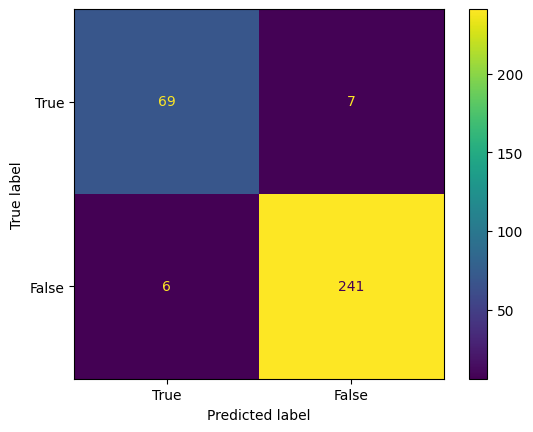

In [ ]:
lg= confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = lg, display_labels=['True', 'False'])
disp.plot()
plt.show()

In [ ]:
recall = recall_score(y_test, y_test_pred, pos_label=1)
print("Recall:", recall)
precision = precision_score(y_test, y_test_pred, pos_label=1)
print("Precision:", precision)

Recall: 0.9757085020242915
Precision: 0.9717741935483871


#thử lại mô hình trên tập thực tế 2021

In [ ]:
df_test_2021=df2[a][df2['Năm']==2021]

In [ ]:
X_2021 = df_test_2021[['X1', 'X6', 'X11', 'X18', 'X26']]
Y_2021 = df_test_2021['class']

In [ ]:
y_pred_2021 = model.predict(X_2021)

In [ ]:
print(f"Accuracy on data 2021: {accuracy_score(list(Y_2021), list(y_pred_2021)):.2f}")

Accuracy on data 2021: 0.95


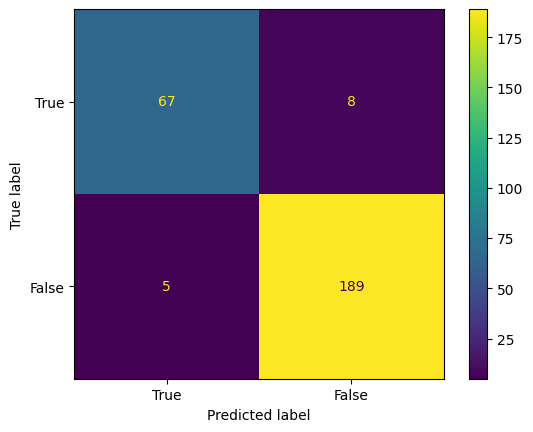

In [ ]:
lg= confusion_matrix(Y_2021, y_pred_2021)
disp = ConfusionMatrixDisplay(confusion_matrix = lg, display_labels=['True', 'False'])
disp.plot()
plt.show()

#dùng mạng nơ ron và các biến của mô hình lasso để dự báo cho năm 2022


In [ ]:
#Tạo bộ dữ liệu năm 2022
df_2022 = df2[['X1', 'X6', 'X11', 'X18', 'X26']][df2['Năm']==2022]

In [ ]:
# Dự đoán giá trị trên tập 2022
y_2022 = model.predict(df_2022)

In [ ]:
#Đưa cột kết quả dự báo vào df và hiển thị
df_2022['kqdd']=y_2022
df_2022.head(5)

,X1,X6,X11,X18,X26,kqdd
7,1.764787,1.416315,0.0147,0.131362,0.693346,1.0
15,22.790998,0.969934,0.0805,0.005060,0.877695,1.0
47,2.025619,0.990521,0.1057,0.005754,0.976378,1.0
63,2.166075,0.305858,0.0503,0.005421,0.987119,1.0
79,1.839102,0.787752,0.0802,0.000000,1.000000,1.0


#Thống kê kết quả năm 2021

In [ ]:
cols = ['Mã', 'Vốn lưu động', 'Tổng tài sản', 'Lợi nhuận sau thuế', 'EBIT', 'Vốn chủ sở hữu', 'Nợ phải trả', 'Doanh thu thuần']
df2[cols].describe()

,Vốn lưu động,Tổng tài sản,Lợi nhuận sau thuế,EBIT,Vốn chủ sở hữu,Nợ phải trả,Doanh thu thuần
count,2.152000e+03,2.152000e+03,2.152000e+03,2.152000e+03,2.152000e+03,2.152000e+03,2.152000e+03
mean,3.936175e+11,2.823827e+12,2.389965e+11,2.763752e+11,1.389024e+12,1.433468e+12,2.721691e+12
std,1.633218e+12,1.006203e+13,1.212541e+12,1.345673e+12,4.839576e+12,5.649945e+12,8.075412e+12
min,-1.764625e+13,7.238242e+09,-1.197177e+12,-9.731545e+11,-6.318292e+11,1.688337e+09,2.431395e+09
25%,1.585863e+10,2.356273e+11,6.205956e+09,9.925274e+09,1.066760e+11,1.012665e+11,2.961478e+11
50%,9.150480e+10,6.197162e+11,2.457002e+10,3.521104e+10,2.818175e+11,3.016687e+11,7.631310e+11
75%,2.806001e+11,1.780746e+12,9.932837e+10,1.326295e+11,8.426312e+11,8.519462e+11,1.884384e+12
max,2.069554e+13,1.782364e+14,3.452095e+13,3.766408e+13,9.611294e+13,1.047061e+14,1.496798e+14


In [ ]:
df_test_2021['kqmh']=y_pred_2021

In [ ]:
df_test_2021.head(5)

,X1,X6,X11,X18,X26,class,kqmh
6,1.631340,1.313060,0.0312,0.127159,0.720578,1.0,1.0
14,29.407049,0.666925,0.0011,0.006051,0.820044,1.0,1.0
46,1.721996,0.574899,0.0594,0.007018,0.976262,1.0,1.0
62,1.807680,0.300281,0.0360,0.215051,0.639094,0.0,0.0
78,1.540935,0.832354,0.0270,0.000000,1.000000,1.0,1.0


X1
Khả năng thanh toán: CR=Tài sản ngắn hạn / Nợ ngắn hạn


X6
Hiệu năng hoạt động TAT= Doanh thu thuần / Tổng tài sản


X11
Khả năng sinh lời: ROA= Lợi nhuận sau thuế/Tổng tài sản


X18
Nợ dài hạn / Tổng tài sản


X26
Cơ cấu nợ:  DS= Nợ ngắn hạn / Nợ phải trả





In [ ]:
summary1 = df_test_2021[df_test_2021['kqmh'] == 1][['X1','X6','X11','X18','X26']].describe()#thống kê các biến của ko có nguy cơ rủi ro tài chính
print(summary1)
summary0 = df_test_2021[df_test_2021['kqmh'] == 0][['X1','X6','X11','X18','X26']].describe()#thống kê các biến của có nguy cơ rủi ro tài chính
print(summary0)

               X1          X6         X11         X18         X26
count  197.000000  197.000000  197.000000  197.000000  197.000000
mean     2.631821    1.438732    0.079827    0.029224    0.927545
std      3.005955    1.139223    0.067965    0.062398    0.125529
min      0.413080    0.113765   -0.108400    0.000000    0.077505
25%      1.331958    0.907549    0.028400    0.000142    0.915759
50%      1.782231    1.219373    0.067600    0.008084    0.974867
75%      2.773966    1.604201    0.116200    0.033961    0.999662
max     29.407049   10.677255    0.331800    0.698138    1.000000
              X1         X6        X11        X18        X26
count  72.000000  72.000000  72.000000  72.000000  72.000000
mean    1.031269   0.795225  -0.006560   0.146138   0.785176
std     0.506163   0.328839   0.100322   0.135469   0.196760
min     0.031583   0.093716  -0.672400   0.000000   0.166754
25%     0.774662   0.625768  -0.003450   0.035943   0.626281
50%     1.068898   0.790906   0.013000  

# Trực quan hóa dữ liệu:

#biểu đồ dựa vào kết quả dự đoán của mô hình trong năm 2021 vẽ biểu đồ xu hướng của ROA trung bình qua từng năm của hai loại hình doanh nghiệp là 1 và 0

In [1]:
df22 = df2.groupby(['class','Năm' ])[['X1', 'X6', 'X11', 'X18', 'X26']].mean()
df22.reset_index(level=['Năm'], inplace=True)

NameError: name 'df2' is not defined

In [ ]:
#lọc dữ liệu theo hai loại doanh nghiệp
df_class_0 = pd.DataFrame(df22.loc[0, ['Năm','X1']])
df_class_1 = pd.DataFrame(df22.loc[1, ['Năm','X1']])
# Vẽ biểu đồ scatter plot cho mỗi lớp
#plt.plot(df_class_0,  color='blue', label='Class 0')
plt.plot(df_class_0['Năm'],df_class_0['X1'], color='blue', label='Class 0')
plt.plot(df_class_1['Năm'],df_class_1['X1'], color='red', label='Class 1')

#plt.xlabel('Khả năng thanh toán')
plt.ylabel('khoảng')
plt.title('Khả năng thanh toán qua từng năm')
plt.legend()
#plt.grid(True)
plt.show()

In [ ]:
#lọc dữ liệu theo hai loại doanh nghiệp
df_class_0 = pd.DataFrame(df22.loc[0, ['Năm','X6']])
df_class_1 = pd.DataFrame(df22.loc[1, ['Năm','X6']])
# Vẽ biểu đồ scatter plot cho mỗi lớp
#plt.plot(df_class_0,  color='blue', label='Class 0')
plt.plot(df_class_0['Năm'],df_class_0['X6'], color='blue', label='Class 0')
plt.plot(df_class_1['Năm'],df_class_1['X6'], color='red', label='Class 1')

#plt.xlabel('Khả năng thanh toán')
plt.ylabel('khoảng')
plt.title('Hiệu suất hoạt động')
plt.legend()
#plt.grid(True)
plt.show()

In [ ]:
#lọc dữ liệu theo hai loại doanh nghiệp
df_class_0 = pd.DataFrame(df22.loc[0, ['Năm','X11']])
df_class_1 = pd.DataFrame(df22.loc[1, ['Năm','X11']])
# Vẽ biểu đồ scatter plot cho mỗi lớp
#plt.plot(df_class_0,  color='blue', label='Class 0')
plt.plot(df_class_0['Năm'],df_class_0['X11'], color='blue', label='Class 0')
plt.plot(df_class_1['Năm'],df_class_1['X11'], color='red', label='Class 1')

#plt.xlabel('Khả năng thanh toán')
plt.ylabel('khoảng')
plt.title('Khả năng sinh lời (ROA) qua từng năm')
plt.legend()
#plt.grid(True)
plt.show()

In [ ]:
#lọc dữ liệu theo hai loại doanh nghiệp
df_class_0 = pd.DataFrame(df22.loc[0, ['Năm','X18']])
df_class_1 = pd.DataFrame(df22.loc[1, ['Năm','X18']])
# Vẽ biểu đồ scatter plot cho mỗi lớp
#plt.plot(df_class_0,  color='blue', label='Class 0')
plt.plot(df_class_0['Năm'],df_class_0['X18'], color='blue', label='Class 0')
plt.plot(df_class_1['Năm'],df_class_1['X18'], color='red', label='Class 1')

#plt.xlabel('Khả năng thanh toán')
plt.ylabel('khoảng')
plt.title('nợ dài hạn trên tổng tài sản qua từng năm năm')
plt.legend()
#plt.grid(True)
plt.show()

In [ ]:
#lọc dữ liệu theo hai loại doanh nghiệp
df_class_0 = pd.DataFrame(df22.loc[0, ['Năm','X26']])
df_class_1 = pd.DataFrame(df22.loc[1, ['Năm','X26']])
# Vẽ biểu đồ scatter plot cho mỗi lớp
#plt.plot(df_class_0,  color='blue', label='Class 0')
plt.plot(df_class_0['Năm'],df_class_0['X26'], color='blue', label='Class 0')
plt.plot(df_class_1['Năm'],df_class_1['X26'], color='red', label='Class 1')

#plt.xlabel('Khả năng thanh toán')
plt.ylabel('khoảng')
plt.title('cơ cấu nợ qua từng năm')
plt.legend()
#plt.grid(True)
plt.show()